In [65]:
from utils import read_pkl
from data import data_loader
from spread import spread_manager
import datetime as dt
import pandas as pd
from revert import df_to_rev

import matplotlib.pyplot as plt

In [ ]:
filename='t025imb1corr090typeabs.pkl' #load in whatever you named the coef_matrix

data=data_loader('2024-01-01')
path='data/'+data.dataset+'/'+filename
coefs=read_pkl(path)

In [3]:
price_data=data.load_price()
price_data['CONST']=1

In [33]:
spreads=spread_manager(price_data,coefs)
spreads.calc_costs()
signals=spreads.raw_signal()

In [66]:
temp=signals[['Automobiles & Components 1','Banks 1','Banks 2']]

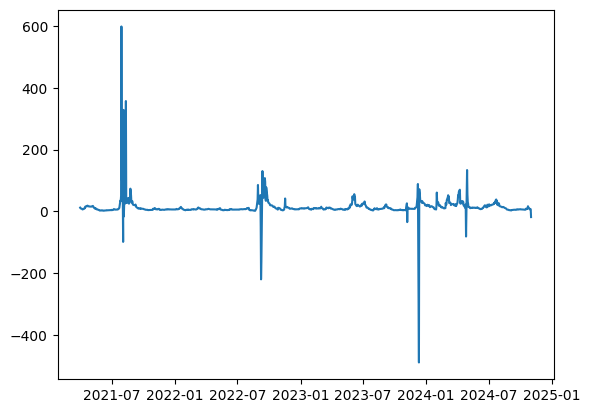

In [72]:
temp_2=df_to_rev(temp,lag=180)

plt.plot(temp_2['Automobiles & Components 1'])
plt.show()

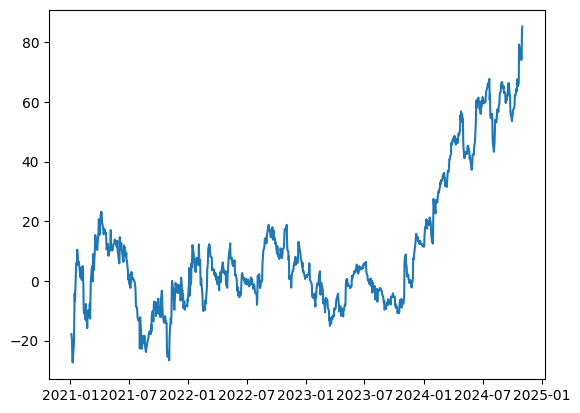

In [74]:
plt.plot(spreads.spreads['Automobiles & Components 1'])
plt.show()

NEED TO COME UP WITH NEW MEAN REVERSION METRIC

Spread & Signal Construction End

Test of Spread Consistency

In [42]:
cutoff_1=pd.Timestamp(dt.datetime(2023,12,31))
cutoff_2=pd.Timestamp(dt.datetime(2024,2,28))

signals_train=signals[signals.index<cutoff_1]
signals_test_1=signals[(signals.index>cutoff_1)&(signals.index<cutoff_2)]
signals_test_2=signals[signals.index>cutoff_2]

In [44]:
train_means=signals_train.mean(axis=0)
train_stds=signals_train.std(axis=0)

test_1_means=signals_test_1.mean(axis=0)
test_1_stds=signals_test_1.std(axis=0)

test_2_means=signals_test_2.mean(axis=0)
test_2_stds=signals_test_2.std(axis=0)

In [47]:
df=pd.concat([train_means,train_stds,test_1_means,test_1_stds,test_2_means,test_2_stds],axis=1)

In [54]:
df.columns=['Train Avg','Train Std','Test 1 Avg','Test 1 Std','Test 2 Avg','Test 2 Std']

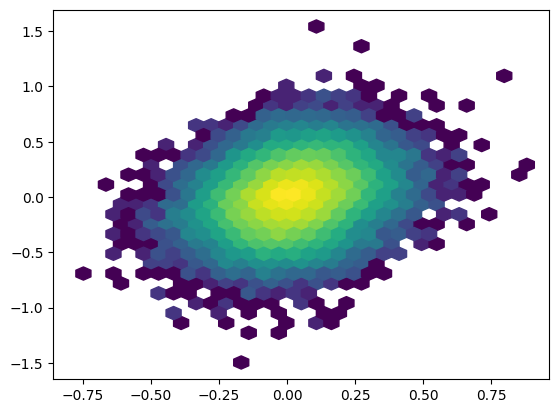

In [60]:
plt.hexbin(df['Test 1 Avg']-df['Train Avg'],df['Test 2 Avg']-df['Test 1 Avg'],gridsize=30,bins='log')
plt.show()

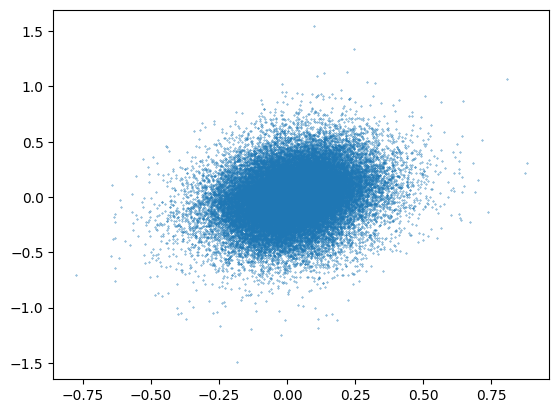

In [62]:
plt.scatter(df['Test 1 Avg']-df['Train Avg'],df['Test 2 Avg']-df['Test 1 Avg'],s=0.1)
plt.show()

From this we see that drift in spreads tends to be persistent, so we can reasonably expect prices that have drifted over some range between training & testing to drift further in execution

In [63]:
df['diff_train']=df['Test 1 Avg']-df['Train Avg']
df['diff_test']=df['Test 2 Avg']-df['Test 1 Avg']

df[['diff_train','diff_test']].corr()

,diff_train,diff_test
diff_train,1.000000,0.243106
diff_test,0.243106,1.000000
